## Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Problem 1

### Code

In [9]:

def SIR_P1(S0,I0,R0, beta, gamma, mu_birth, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N0 = R0 + I0 + S0
    N = np.zeros(len(T))
    mu_death = 0.5*mu_birth
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
            N[idx] = N0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N[idx-1] - mu_death*S[idx-1] + mu_birth*N[idx-1]
            dI_dt = beta * S[idx-1] * I[idx-1] / N[idx-1] - gamma * I[idx-1] - mu_death*I[idx-1]
            dR_dt = gamma * I[idx-1] - mu_death*R[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
            N[idx] = S[idx] + I[idx] + R[idx]
            
    return S, I, R, N, T

### Simulation and plot

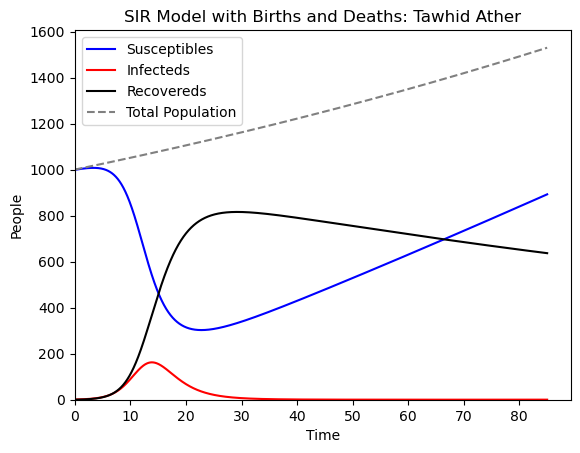

In [10]:
N0 = 1000
I0 = 1
S0 = 999
R0 = N0 - I0 - S0
beta = 1
gamma = 0.5
mu_birth = 0.01
max_t = 85
stepsize = 0.01

# SIR_P1(S0,I0,R0, beta, gamma, t_max, stepsize):
S,I,R,N,T = SIR_P1(S0,I0, R0, beta, gamma, mu_birth, max_t, stepsize)
fig, ax = plt.subplots()
ax.plot(T,S, color='b', label='Susceptibles')
ax.plot(T,I, color='r', label='Infecteds')
ax.plot(T,R, color='k', label='Recovereds')
ax.plot(T,N, linestyle='--', color='gray', label='Total Population')
ax.set_xlabel('Time')
ax.set_ylabel('People')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.title('SIR Model with Births and Deaths: Tawhid Ather')
plt.show()

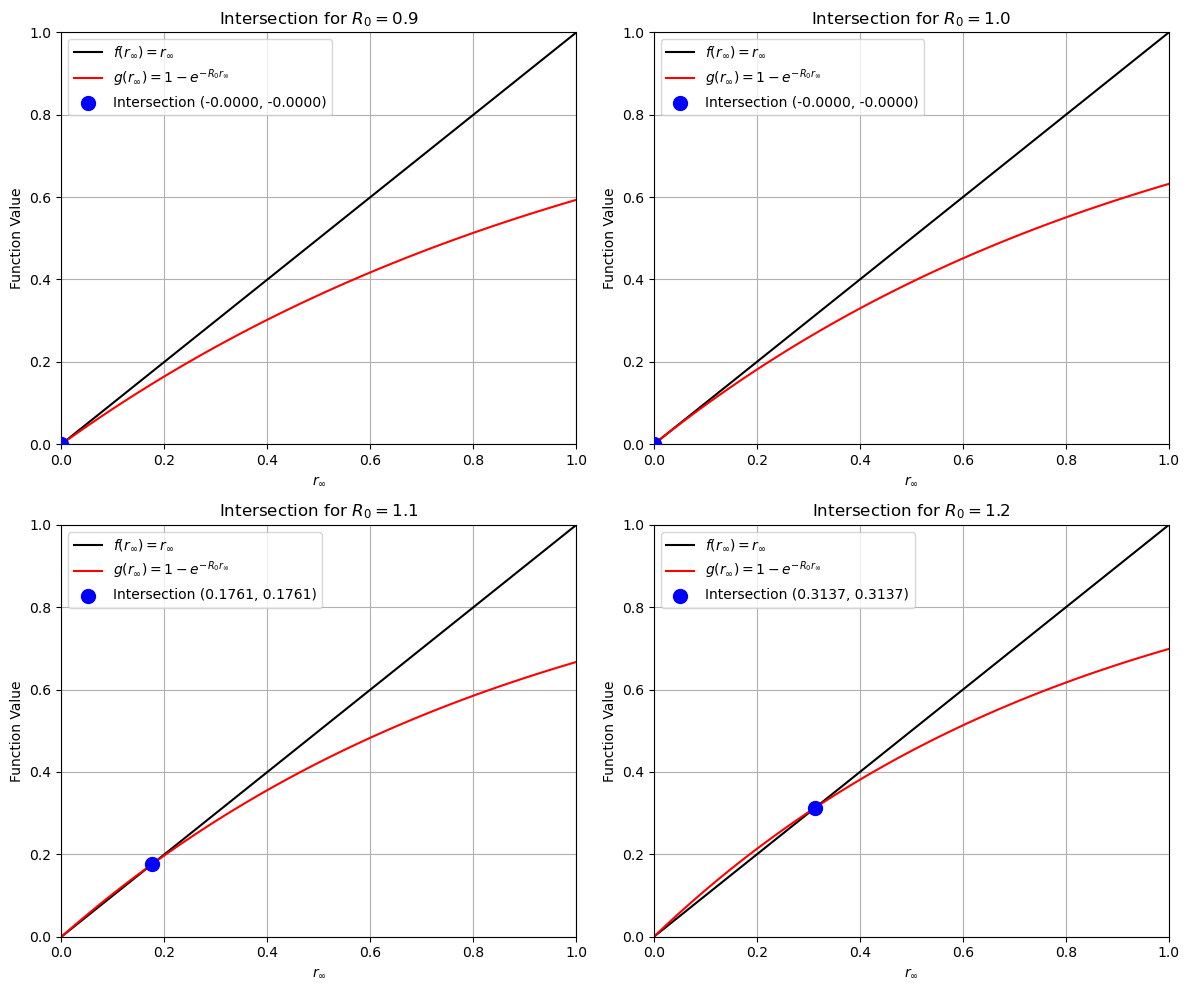

In [ ]:
def f(r_inf):
    return r_inf

def g(r_inf, R0):
    return 1 - np.exp(-R0 * r_inf)

def eq(r_inf, R0):
    return f(r_inf) - g(r_inf, R0)

R0_values = [0.9, 1.0, 1.1, 1.2]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

r_inf_plot = np.linspace(0, 1, 100)
f_values = f(r_inf_plot)

for i, R0 in enumerate(R0_values):
    g_values = g(r_inf_plot, R0)
    intersection = fsolve(eq, 0.5, args=(R0,))[0]
    y_intersection = f(intersection)
    axes[i].plot(r_inf_plot, f_values, color='black', label=r'$f(r_{\infty}) = r_{\infty}$')
    axes[i].plot(r_inf_plot, g_values, color='red', label=r'$g(r_{\infty}) = 1 - e^{-R_0 r_{\infty}}$')
    axes[i].scatter(intersection, y_intersection, color='blue', s=100, zorder=5, label=f'Intersection ({intersection:.4f}, {y_intersection:.4f})')
    axes[i].set_xlabel(r'$r_{\infty}$')
    axes[i].set_ylabel('Function Value')
    axes[i].set_title(r'Intersection for $R_0 = {}$'.format(R0))
    axes[i].legend()
    axes[i].grid(True)
    axes[i].set_xlim(0, 1)
    axes[i].set_ylim(0, 1)
plt.tight_layout()
plt.show()

The basic reproduction number R₀ is: 2.0


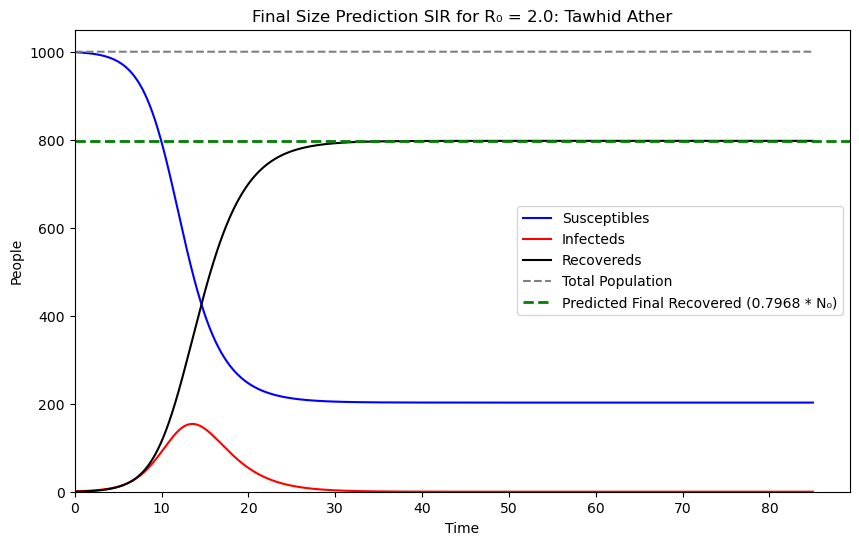

The predicted final size (as a fraction of N0) is: 0.7968
The simulated final recovered population is: 797.4321
The final recovered fraction from simulation is: 0.7974


In [31]:
def SIR_P3(S0, I0, R0_initial, beta, gamma, t_max, stepsize):
    T = np.arange(0, t_max + stepsize, stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N0 = S0 + I0 + R0_initial
    N = np.zeros(len(T))
    
    for idx, t in enumerate(T):
        if idx == 0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0_initial
            N[idx] = N0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N[idx-1]
            dI_dt = beta * S[idx-1] * I[idx-1] / N[idx-1] - gamma * I[idx-1]
            dR_dt = gamma * I[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
            N[idx] = S[idx] + I[idx] + R[idx]
            
    return S, I, R, N, T

N0 = 1000
I0 = 1
S0 = N0 - I0
R0_initial = 0
beta = 1.0
gamma = 0.5
t_max = 85
stepsize = 0.01

R0_sir = beta / gamma
print(f"The basic reproduction number R₀ is: {R0_sir}")

def final_size_eq(r_inf, R0_sir):
    return 1 - np.exp(-R0_sir * r_inf) - r_inf

final_size_predicted = fsolve(final_size_eq, 0.5, args=(R0_sir,))[0]

S, I, R, N, T = SIR_P3(S0, I0, R0_initial, beta, gamma, t_max, stepsize)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(T, S, color='b', label='Susceptibles')
ax.plot(T, I, color='r', label='Infecteds')
ax.plot(T, R, color='k', label='Recovereds')
ax.plot(T, N, linestyle='--', color='gray', label='Total Population')

final_recovered_fraction = R[-1] / N0
ax.axhline(y=final_size_predicted * N0, color='g', linestyle='--', linewidth=2, label=f'Predicted Final Recovered ({final_size_predicted:.4f} * N₀)')

ax.set_xlabel('Time')
ax.set_ylabel('People')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.title(f'Final Size Prediction SIR for R₀ = {R0_sir}: Tawhid Ather')
plt.show()

print(f"The predicted final size (as a fraction of N0) is: {final_size_predicted:.4f}")
print(f"The simulated final recovered population is: {R[-1]:.4f}")
print(f"The final recovered fraction from simulation is: {final_recovered_fraction:.4f}")

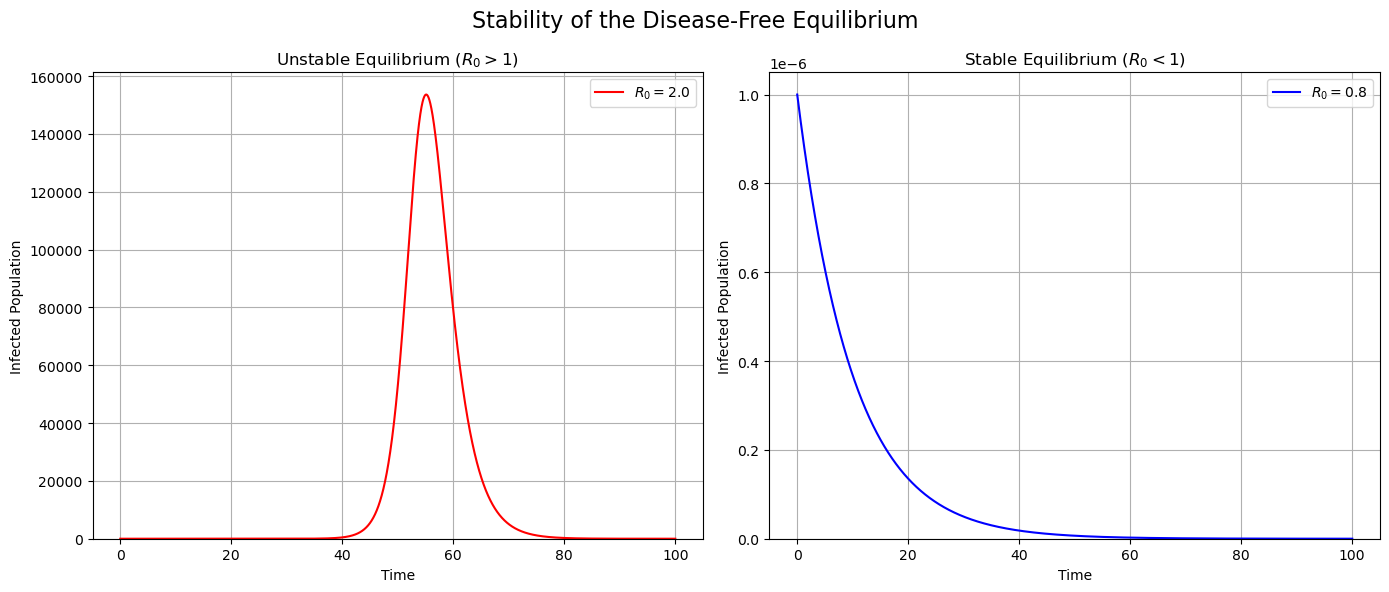

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def SIR_P4(S0, I0, R0_initial, beta, gamma, t_max, stepsize):
    T = np.arange(0, t_max + stepsize, stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N0 = S0 + I0 + R0_initial
    N = np.zeros(len(T))
    
    for idx, t in enumerate(T):
        if idx == 0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0_initial
            N[idx] = N0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N[idx-1]
            dI_dt = beta * S[idx-1] * I[idx-1] / N[idx-1] - gamma * I[idx-1]
            dR_dt = gamma * I[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
            N[idx] = S[idx] + I[idx] + R[idx]
            
    return S, I, R, N, T

N_total = 10**6
I0_initial = 1/N_total
S0_initial = N_total - I0_initial
R0_initial = 0
gamma = 0.5
t_max = 100
stepsize = 0.01

beta_unstable = 1.0
R0_unstable = beta_unstable / gamma
S_u, I_u, R_u, N_u, T_u = SIR_P4(S0_initial, I0_initial, R0_initial, beta_unstable, gamma, t_max, stepsize)

beta_stable = 0.4
R0_stable = beta_stable / gamma
S_s, I_s, R_s, N_s, T_s = SIR_P4(S0_initial, I0_initial, R0_initial, beta_stable, gamma, t_max, stepsize)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Stability of the Disease-Free Equilibrium', fontsize=16)

ax1.plot(T_u, I_u, color='red', label=f'$R_0 = {R0_unstable:.1f}$')
ax1.set_title('Unstable Equilibrium ($R_0 > 1$)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Infected Population')
ax1.set_ylim(bottom=0)
ax1.legend()
ax1.grid(True)

ax2.plot(T_s, I_s, color='blue', label=f'$R_0 = {R0_stable:.1f}$')
ax2.set_title('Stable Equilibrium ($R_0 < 1$)')
ax2.set_xlabel('Time')
ax2.set_ylabel('Infected Population')
ax2.set_ylim(bottom=0)
ax2.legend()
ax2.grid(True)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()